<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/regression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION LOGISTIQUE AVEC **Python**

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Classification par régression logistique

Scénario
Imaginez que vous travaillez pour une entreprise de télécommunications préoccupée par le nombre de clients quittant leur réseau fixe pour des concurrents. Elle doit identifier les personnes les plus susceptibles de quitter l'entreprise.

À propos du dataset

Nous utiliserons un dataset sur les télécommunications pour prédire la perte de clientèle. Il s'agit d'un historique de données clients où chaque ligne représente un client. Les données sont relativement faciles à comprendre et vous permettent d'en tirer des enseignements immédiatement exploitables. Il est généralement moins coûteux de fidéliser les clients que d'en acquérir de nouveaux ; l'objectif de cette analyse est donc de prédire les clients qui resteront fidèles à l'entreprise.

Ce dataset vous fournit des informations sur les préférences des clients, les services choisis, les informations personnelles, etc., ce qui vous aide à prédire la perte de clientèle.

In [5]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"

df = pd.read_csv(url)
# df.to_csv('client.csv',index=0)


In [6]:
df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
96,51.0,48.0,27.0,58.0,1.0,18.0,0.0,1.0,0.0,19.20,...,0.0,0.0,0.0,1.0,0.0,2.955,3.248,4.060,3.0,1.0
79,45.0,30.0,0.0,63.0,5.0,4.0,1.0,1.0,1.0,7.10,...,1.0,1.0,1.0,1.0,1.0,1.960,3.707,4.143,4.0,1.0
189,66.0,50.0,2.0,333.0,5.0,24.0,0.0,1.0,0.0,10.30,...,1.0,1.0,0.0,0.0,0.0,2.332,3.240,5.808,2.0,0.0
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
90,25.0,29.0,9.0,55.0,4.0,1.0,0.0,0.0,0.0,5.25,...,0.0,0.0,0.0,0.0,1.0,1.658,3.209,4.007,1.0,1.0


In [7]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

Sélectionnons quelques features pour la modélisation. Nous modifions également le type de données cible pour qu'il soit un entier, conformément à l'algorithme scikit-learn :

Prétraitement des données

In [12]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
df['churn'] = df['churn'].astype('int')

In [13]:
df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


Pour la modélisation, les champs d'entrée X et le champ cible Y doivent être définis. Puisque la cible à prédire est le « churn  en francais taux de désabonnement», les données de ce champ seront stockées dans la variable « y ». Nous pouvons utiliser n'importe quelle combinaison ou tous les champs restants comme entrée. Stockez ces valeurs dans la variable « X ».

In [20]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [21]:
type(X)

numpy.ndarray

Il est également courant de standardiser ou de normaliser l'ensemble de données afin d'avoir toutes les caractéristiques à la même échelle.

In [29]:
y = np.asarray(df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

In [ ]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

Séparation de de l'ensemble de données 80% train et 20% test

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2, random_state=4)

Modélisation du classificateur par régression logistique

In [34]:
LR = LogisticRegression().fit(X_train,y_train)

Prédisons le paramètre de désabonnement pour l'ensemble de données de test.

In [35]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Pour comprendre cette prédiction, nous pouvons également examiner la probabilité de prédiction des points de données de l'ensemble de données de test. La fonction predict_proba permet d'obtenir la probabilité de chaque classe. La première colonne indique la probabilité que l'enregistrement appartienne à la classe 0, et la seconde à la classe 1. Notez que le système de prédiction de classe utilise un seuil de 0,5. Cela signifie que la classe prédite est la plus probable.

In [36]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

L'objectif étant ici de prédire la classe 1 avec plus de précision, vous pouvez également examiner le rôle de chaque caractéristique d'entrée dans la prédiction de cette classe. Considérez le code ci-dessous.

In [37]:
df.columns[:-1]

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip'], dtype='object')

In [38]:
LR.coef_[0]

array([-0.84569763, -0.17566042, -0.12422107, -0.01015039,  0.06012391,
       -0.23290551,  0.75198953])

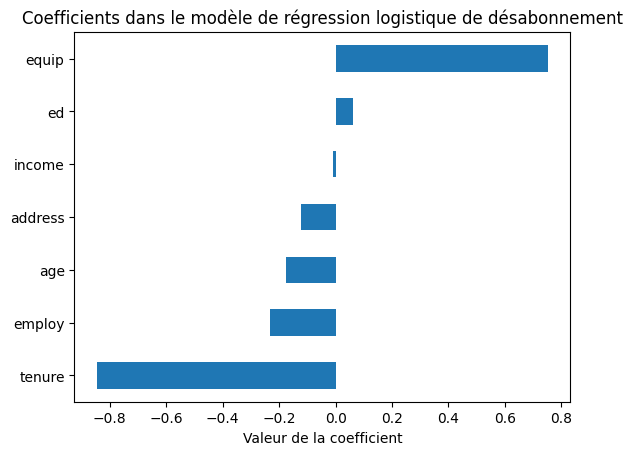

In [39]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Coefficients dans le modèle de régression logistique de désabonnement")
plt.xlabel("Valeur de la coefficient")
plt.show()